In [236]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# To do

## Data
### Delete Outliers
### Transform Target to Normal Distribution for better handling
### Check missing data
### Correlation matrix
### Fill missing data
### Categorical to numerical variables
### Merge identical data
### Check skew
### Transform skewed
### Dummy

## Modelling
### Define cross-validation strategy
### Try different models
### Scores
### Ensemble learning -> Combine models

In [237]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [238]:
train = pd.read_csv('C:/Users/bq352re/Desktop/real_estate_ML/train.csv')
test = pd.read_csv('C:/Users/bq352re/Desktop/real_estate_ML/test.csv')

# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the  'Id' column as it's redundant for modeling
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print('The train data size is {}'.format(train.shape))
print('The test data size is {}'.format(test.shape))
train.head()

The train data size is (1460, 80)
The test data size is (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Quick explore of data

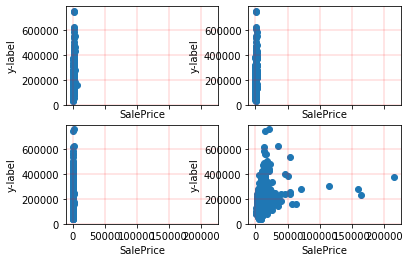

In [239]:
titles = list(train.columns.values)

def displayPlot(pd, features):
    fig, axs = plt.subplots(2, 2, sharex = True)
    axs[0, 0].scatter(x = pd[features[37]], y = pd['SalePrice'])
    axs[0, 0].grid(color='r', linestyle = '-', linewidth = 0.2)
    #axs[0, 0].ylabel('SalePrice', fontsize = 13)
    #axs[0, 0].xlabel(feature1, fontsize = 13)
    axs[0, 1].scatter(x = pd[features[36]], y = pd['SalePrice'])
    axs[0, 1].grid(color='r', linestyle = '-', linewidth = 0.2)
    #axs[0, 1].ylabel('SalePrice', fontsize = 13)
    #axs[0, 1].xlabel(feature2, fontsize = 13)
    axs[1, 0].scatter(x = pd[features[25]], y = pd['SalePrice'])
    axs[1, 0].grid(color='r', linestyle = '-', linewidth = 0.2)
    axs[1, 1].scatter(x = pd[features[3]], y = pd['SalePrice'])
    axs[1, 1].grid(color='r', linestyle = '-', linewidth = 0.2)
    
    for ax in axs.flat:
        ax.set(xlabel = 'SalePrice', ylabel = 'y-label')
    
    #for ax in axs.flat:
    #    ax.label_outer()
        
    plt.show()
    
    

displayPlot(train, titles)

In [240]:
#def findType(pd, titles):
types = {}
for key, title in zip(range(len(titles)), titles):
    types[key] = type(train[title].loc[0])
types;

In [241]:
#train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

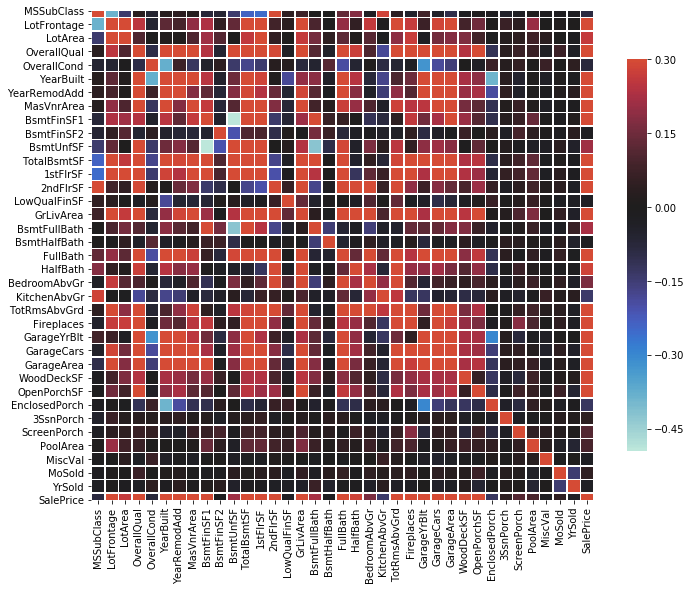

In [242]:
corr = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .8});

## One way of handling Target data
* if data is log-normally distributed, then *log transformation* makes it normally distributed.
* target is right skewed, so it follows a lognormal distribution

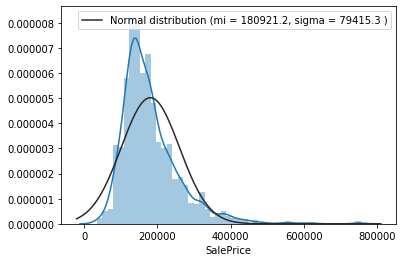

In [243]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(train['SalePrice'], fit = norm);

(mi, sigma) = norm.fit(train['SalePrice'])

plt.legend(['Normal distribution (mi = {:.1f}, sigma = {:.1f} )'.format(mi, sigma)], loc = 'best');

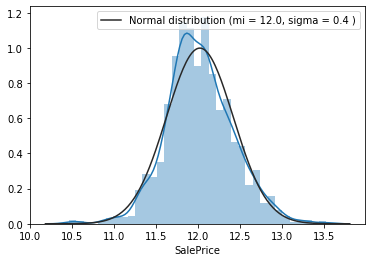

In [244]:
train1 = train.copy()
train1['SalePrice'] = np.log(1 + train1['SalePrice'])

sns.distplot(train1['SalePrice'], fit = norm);

(mi, sigma) = norm.fit(train1['SalePrice'])

plt.legend(['Normal distribution (mi = {:.1f}, sigma = {:.1f} )'.format(mi, sigma)], loc = 'best');

## Exploring and handling missing data

In [245]:
missing_data = pd.DataFrame({'Number_of_missing_values' :train.isnull().sum(), '%_missing_data' :train.isnull().sum() / len(train) * 100})
missing_data = missing_data[(missing_data.T != 0).any()]
missing_data

,Number_of_missing_values,%_missing_data
LotFrontage,259,17.739726
Alley,1369,93.767123
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtFinType2,38,2.602740
Electrical,1,0.068493


In [246]:
missing_data_test = pd.DataFrame({'Number_of_missing_values' :test.isnull().sum(), '%_missing_data' :test.isnull().sum() / len(test) * 100})
missing_data_test = missing_data_test[(missing_data_test.T != 0).any()]
missing_data_test

,Number_of_missing_values,%_missing_data
MSZoning,4,0.274160
LotFrontage,227,15.558602
Alley,1352,92.666210
Utilities,2,0.137080
Exterior1st,1,0.068540
Exterior2nd,1,0.068540
MasVnrType,16,1.096642
MasVnrArea,15,1.028101
BsmtQual,44,3.015764
BsmtCond,45,3.084304


In [247]:
missing_data_to_drop = missing_data[(missing_data['%_missing_data'] > 50)]
missing_data_to_fix = missing_data[(missing_data['%_missing_data'] <= 50)]
missing_data_to_drop_test = missing_data_test[(missing_data_test['%_missing_data'] > 50)]
missing_data_to_fix_test = missing_data_test[(missing_data_test['%_missing_data'] <= 50)]

In [248]:
columns_to_drop_train = list(missing_data_to_drop.index)
columns_to_drop_train

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [249]:
columns_to_drop_test = list(missing_data_to_drop_test.index)
columns_to_drop_test

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [251]:
df_train = train.drop(columns_to_drop_test, axis = 1)
df_test = test.drop(columns_to_drop_test, axis = 1)
print('New dimensions of train data is {}'.format(df_train.shape))
print('New dimensions of test data is {}'.format(df_test.shape))

New dimensions of train data is (1460, 75)
New dimensions of test data is (1459, 74)


## Remove Outliers

C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


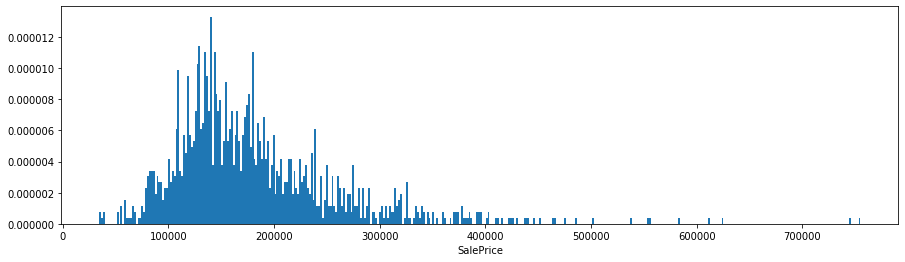

In [252]:
def fig_out(df, title):
    fig = plt.rcParams['figure.figsize']
    fig[0] = 15.0
    fig[1] = 4.0

    x1 = df[title]
    plt.hist(x1, normed = True, bins = 400)
    plt.xlabel(title)

fig_out(df_train, 'SalePrice')


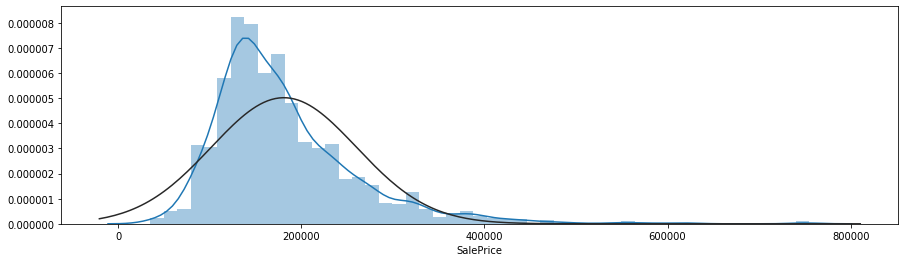

In [253]:
sns.distplot(df_train['SalePrice'], fit = norm);
(mi, sigma) = norm.fit(train['SalePrice'])

C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


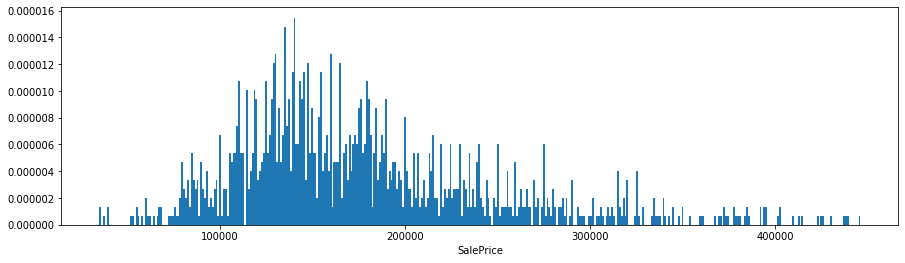

In [254]:
df_out = df_train.where(df_train['SalePrice'] < 450000)
fig_out(df_out, title)

## Splitting X (Feature) data and y (Target) data

In [257]:
X_train = df_out.drop(['SalePrice'], axis = 1)
y_train = df_out['SalePrice']
X_test = df_test

## Example of merging columns with similar info

In [258]:
X_train['total_Area'] = (X_train['TotalBsmtSF'] + 
                         X_train['1stFlrSF'] + 
                         X_train['2ndFlrSF'])
X_train = X_train.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)

X_test['total_Area'] = (X_test['TotalBsmtSF'] + 
                         X_test['1stFlrSF'] + 
                         X_test['2ndFlrSF'])
X_test = X_test.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)

## Process to fill missing data

In [259]:
title_types = {}
title_str = []
title_num = []
titles = X_train.columns
for title in titles:
    title_types[title] = type(X_train[title].iloc[1])
    if title_types[title] == str:
        title_str.append(title)
    else:
        title_num.append(title)

In [260]:
for title in title_num:
    title;
    for i in range(X_train.shape[0]):
        if np.isnan(X_train[title].iloc[i]):
            i;
            

In [261]:
# Fill numerical values with random number between (mean - std, mean + std)
for title in title_num:
    for pos in range(X_train[title].shape[0]):
        if np.isnan(X_train[title].iloc[pos]):
            X_train[title].iloc[pos] = np.random.uniform(X_train[title].mean() - X_train[title].std(), 
                                                        X_train[title].mean() + X_train[title].std(),
                                                        1)
    for pos in range(X_test[title].shape[0]):
        if np.isnan(X_test[title].iloc[pos]):
            X_test[title].iloc[pos] = np.random.uniform(X_train[title].mean() - X_train[title].std(), 
                                                        X_train[title].mean() + X_train[title].std(),
                                                        1)
            
# Fill numerical values with the most frequent value
for title in title_str:
    X_train = X_train.fillna(X_train[title].value_counts().index[0])
    X_test = X_test.fillna(X_train[title].value_counts().index[0])

C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Categorical to numerical variables

To do so, we use the one hot encoder method.

In [262]:
X_train = pd.get_dummies(X_train, columns = title_str)
X_test = pd.get_dummies(X_test, columns = title_str)
print(X_train.shape)
print(X_test.shape)

(1460, 305)
(1459, 268)


## Dropping columns that do not match in the datasets

In [263]:
new_titles_train = X_train.columns
new_titles_test = X_test.columns
for title in new_titles_train:
    if title not in new_titles_test:
        X_train = X_train.drop([title], axis = 1)
print(X_train.shape)
print(X_test.shape)

(1460, 268)
(1459, 268)


In [264]:
toDrop = list(np.where(np.isnan(y_train)))[0]
y_train = y_train.drop(toDrop)
X_train = X_train.drop(toDrop)
X_test = X_test.drop(toDrop)

## Correlation Matrix

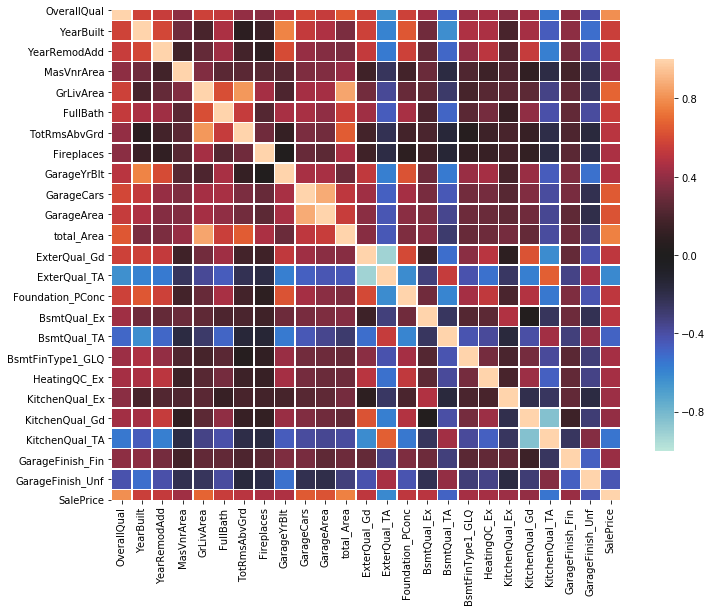

In [265]:
to_Corr = pd.concat([X_train, y_train], axis = 1)
corr_matrix = to_Corr.corr()
maxCorr = corr_matrix.index[abs(corr_matrix['SalePrice']) > 0.4]
plt.subplots(figsize=(12,9))
sns.heatmap(to_Corr[maxCorr].corr(), 
            vmax = 1.0, 
            vmin = -1.0,
            center = 0, 
            square = True, 
            linewidths = .5, 
            cbar_kws = {"shrink": .8});

## Keep only parameters with the higher impact to the sale price

In [267]:
finalList = list(maxCorr)
finalList.remove('SalePrice')

In [279]:
y_train = to_Corr['SalePrice']
X_train = to_Corr[finalList]
X_test = X_test[finalList]

## Min Max Normalization

In [280]:
import sklearn
from sklearn import preprocessing

## Modeling

In [281]:
trainX = X_train[:X_train.shape[0]]
testX = X_test[:X_test.shape[0]]

## Splitting, Training and Scores

In [282]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [283]:
X_train, X_test, y_train, y_test = train_test_split(trainX, y_train, test_size = 0.1, random_state = 42)

1. Lasso Regression Model

In [284]:
reg = linear_model.Lasso(alpha = 0.1)

In [285]:
reg.fit(X_train, y_train)
pred_Lasso = reg.predict(X_test)

In [286]:
pred_Lasso[1:5]

array([276286.68450444,  92467.29783378, 303035.70474617, 236254.44091848])

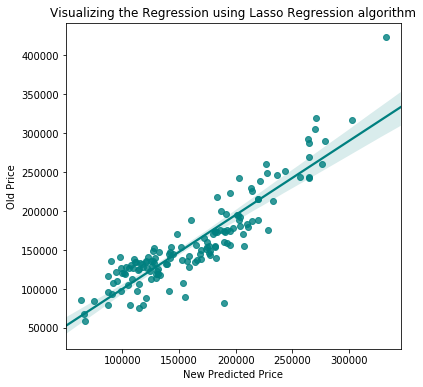

In [229]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression using Lasso Regression algorithm')
sns.regplot(pred_Lasso, y_test, color = 'teal')
plt.xlabel("New Predicted Price")
plt.ylabel("Old Price")
plt.show()

2. Random Forest

In [287]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred_RF = model.predict(X_test)

C:\Users\bq352re\AppData\Local\Continuum\anaconda3\envs\kaggle\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


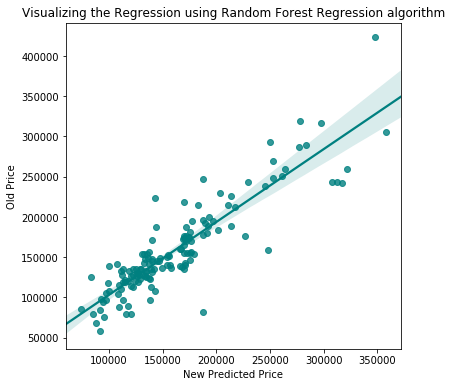

In [288]:
plt.figure(figsize= (6, 6))
plt.title("Visualizing the Regression using Random Forest Regression algorithm")
sns.regplot(pred_RF, y_test, color = 'teal')
plt.xlabel("New Predicted Price")
plt.ylabel("Old Price")
plt.show()

3. Linear Regression Model

In [289]:
model = LinearRegression()
model.fit(X_train, y_train)
pred_LRM = model.predict(X_test)

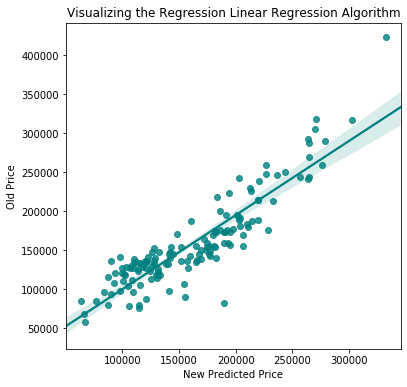

In [290]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression Linear Regression Algorithm')
sns.regplot(pred_LRM, y_test, color = 'teal')
plt.xlabel('New Predicted Price')
plt.ylabel('Old Price')
plt.show()

## Statistical information on the results

In [291]:
print("Mean Absolute Error of Lasso is :", mean_absolute_error(y_test, pred_Lasso))
print("Mean Squared Error of Lasso is :", mean_squared_error(y_test, pred_Lasso))
r2_1 = r2_score(y_test, pred_Lasso) * 100
print("The R2 square value of Lasso is :", r2_1)
print("---------------------------------")
print("Mean Absolute Error of RF is :", mean_absolute_error(y_test, pred_RF))
print("Mean Squared Error of RF is :", mean_squared_error(y_test, pred_RF))
r2_2 = r2_score(y_test, pred_RF) * 100
print("The R2 square value of Rf is :", r2_2)
print("---------------------------------")
print("Mean Absolute Error of LRM is :", mean_absolute_error(y_test, pred_LRM))
print("Mean Squared Error of LRM is :", mean_squared_error(y_test, pred_LRM))
r2_3 = r2_score(y_test, pred_LRM) * 100
print("The R2 square value of LRM is :", r2_3)

Mean Absolute Error of Lasso is : 20376.48071037586
Mean Squared Error of Lasso is : 652495669.3659408
The R2 square value of Lasso is : 80.16704141402025
---------------------------------
Mean Absolute Error of RF is : 17861.394137931034
Mean Squared Error of RF is : 695230441.7816724
The R2 square value of Rf is : 78.86809490556897
---------------------------------
Mean Absolute Error of LRM is : 20376.732078392713
Mean Squared Error of LRM is : 652505788.8023523
The R2 square value of LRM is : 80.16673382828033


In [292]:
best_pred = 0.0
best_mod = ''
if max(r2_1, r2_2, r2_3) == r2_1:
    best_pred = r2_1
    best_mod = 'Lasso'
elif max(r2_1, r2_2, r2_3) == r2_2:
    best_pred = r2_2
    best_mod = 'Random Forest'
else:
    best_pred = r2_3
    best_mod = 'Linear Regression'
print("Best model with prediction score {}% is {}".format(round(best_pred, 2), best_mod))

Best model with prediction score 80.17% is Lasso


## Discussion

The current process was used to practice Data Science concepts and ML techniques in a real life business problem. Tha final results are considered satisfying, though there are many steps that can improve this procedure for reaching a better model. Below, some of them are being listed:
1. Examine thoroughly the initial data, and value every parameter.
2. Represent graphically a group of selected variables to acquire a deeper understanding on their behavior.
3. Transform the target to a normal distribution to avoid noise.
4. Select carefully the parameters that keep a major role in the prediction - using the correlation matrix and/or other techniques.
5. Distribute more efficiently the quantity of data in each dataset.
6. Use more efficient ways to fill the NaNs in the data - drop data where it is necessary.
7. Evaluate the Normalization process.
8. Make a better selection of the techniques that are suitable for this problem.
9. Test them and compare them.
10. Try out different tuning for the hyperparameters and evaluate.
11. Study on the best way to characterize the score reliability.
12. Consider the overfitting effects.
13. Ensemble combination of ML techniques to optimize further the training.
14. Select a better representation of graphs and results.
15. Build a function that give results directly.
16. Maybe more.